# Gathering Data

- In this step three pieces of data were gathered as described below. 
- The methods used to gather each piece of data are different.

### 1. Twitter Archive

- This file was manually downloaded by clicking the following link: twitter_archive_enhanced.csv.

In [654]:
#Import all the packages needed
import pandas as pd
import requests 
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [655]:
#Read csv file
Twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [656]:
#Display of information in DataFrame
Twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [657]:
#Display of datatypes used for each variable
Twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The timestamp variable should be changed from object to Datetime.

### 2. Tweet Image Predictions

- This file (image_predictions.tsv) is present in each tweet according to a neural network. 
- This data is downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [658]:
#The following URL is downloaded programmatically from a website using the Requests library
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

#Read tsv file as a Pandas DataFrame    
image_predictions = pd.read_table('image_predictions.tsv') 


In [659]:
#Consumer API, secrets and tokens have been replaced with proxies to comply with Twitters terms and conditions
consumer_key = 'CONSUMER KEY'
consumer_secret = 'CONSUMER SECRET'
access_token = 'ACCESS TOKEN'
access_secret = 'ACCESS SECRET'

In [660]:
#Tweepy query variables
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


### 3. Twitter API and JSON
- Retweet and Favourite count

In [661]:
tweet_ids = Twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [662]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = ()

In [663]:
#Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile: 

#This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except AttributeError:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = Attribute
print(end - start)
print(fails_dict)

1: 892420643555336193


Unauthorized: 401 Unauthorized
89 - Invalid or expired token.

In [664]:
#Loading the Twitter API data
tweet_data = pd.read_json('C:\\Users\\MWEZI\\Desktop\\Udacity projects\\Data Wrangling\\tweet-json.txt', lines=True)
tweet_data['tweet_id'] = tweet_data['id']
tweet_data = tweet_data[['tweet_id', 'favorite_count', 'retweet_count']]

## Assessing Data

- In this section there will be detection and documention of at least 8 quality issues and 2 tidiness issues.

- Two types of assessment should be used:
1. Visual assessment: each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes. Once displayed, data can additionally be assessed in an external application (e.g. Excel, text editor).
2. Programmatic assessment: pandas' functions and/or methods are used to assess the data

### 1. Twitter Archive

In [665]:
#Displaying the first few rows of the Twitter_archive Dataframe
Twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [666]:
#Displaying the last few rows of the Twitter_arcive DataFrame
Twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [667]:
#Displaying the info and datatypes of each variable in the Twitter archive Dataframe
Twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [668]:
#Displaying useful description statistics for each variable of data in the Dataframe
Twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [669]:
#Displays number of unique values under each variable in the dataframe
Twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [670]:
#Displaying the number of each variable's numerator
Twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [671]:
#Displaying the number of each variable's denominator
Twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [672]:
#Displaying of any duplicated Tweet IDs
sum(Twitter_archive.tweet_id.duplicated())

0

In [673]:
#Displaying of ratings with a denomiator greater than 10
Twitter_archive.query('rating_denominator > 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [674]:
#Displaying the texts of ratings with a denominator of more than 10
Twitter_archive.query('rating_denominator > 10')['text']

342              @docmisterio account started on 11/15/15
433     The floofs have been released I repeat the flo...
784     RT @dog_rates: After so many requests, this is...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1598    Yes I do realize a rating of 4/20 would've bee...
1634    Two sneaky puppers were not initially seen, mo...
1635    Someone help the girl is being mugged. Several...
1662    This is Darrel. He just robbed a 7/11 and is i...
1663    I'm aw

In [675]:
#Displaying ratings with a denominator less than 10
Twitter_archive.query('rating_denominator < 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [676]:
#Displaying of text of ratings with a denominator less than 10
Twitter_archive.query('rating_denominator < 10')['text']

313     @jonnysun @Lin_Manuel ok jomny I know you're e...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object

### 2. Image Predictions

In [677]:
#Displaying first few rows of the image predictions dataframe
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [678]:
#Displaying the info and datatypes of each variable in the image predictions dataframe
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [679]:
#Displaying the useful description statistics of each variable in image predictions
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [680]:
#Displays the sum of duplicated image tweet ids
sum(image_predictions.tweet_id.duplicated())

0

In [681]:
#Displays the sum of duplicated image urls
sum(image_predictions.jpg_url.duplicated())

66

In [682]:
#Display the count of each image prediction
print(image_predictions.p1_dog.value_counts())

print(image_predictions.p2_dog.value_counts())

print(image_predictions.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [683]:
#Display the name and number of variables in the p1 column
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [684]:
#Display the name and number of variables in the p2 column
image_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [685]:
#Display the name and number of variables in the p3 column
image_predictions.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [686]:
#Displays the number of images each variable has in the Image Predicitons Dataframe
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

### 3. Twitter API and JSON

In [687]:
#Displaying the first few rows of the Twitter API Dataframe
tweet_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [688]:
#Displaying the info and datatypes of each variable in Twitter API Dataframe
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [689]:
#Display the useful description statistics of each variable
tweet_data.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [690]:
#Displaying the Twitter API of variables in the Dataframe
tweet_data.sample(30)

,tweet_id,favorite_count,retweet_count
444,819227688460238848,25652,7733
40,884441805382717440,27478,5856
362,829374341691346946,38074,10706
940,752917284578922496,7592,1790
190,855851453814013952,47844,19196
492,813202720496779264,10192,2090
2129,670086499208155136,740,275
671,789903600034189313,11673,4858
1813,676613908052996102,1183,219
514,811386762094317568,23302,7444


## Issues Found

### Quality

#### Twitter Archive
- Dataset contains Retweets
- Numerator and Denominator should be a float and not an integer
- Timestamp should not be an object datatype but instead a datetime
- Missing values in the following columns:in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp,source, img num (columns that are not going to be used for the analysis should be removed).
- The four dogs species should be in the same column
- Incorrect Dog names

#### Image Predictions
- Delete duplicated 66 jpg_urls
- Remove columns that won't be used for analysis
- Create 1 column for image prediction and 1 column for confidence level

#### Twitter API and JSON
- Keep all original tweets

### Tidiness

- Tweet id should be string and not integer
- Join 'tweet_data' and 'image_predictions' to 'twitter_archive (All tables should be in one dataset)
- The four columns in archive data: doggo, floofer, pupper, puppo should have one column as every tweet_id should have one observation from these types.

## Cleaning Data

In [691]:
twitter_archive_clean = Twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

### Quality
- Content Issues

#### Quality Issue 1: Retweets (Twitter archive)

#### Define:
- Remove retweets and keep originals

##### Code:

In [692]:
#Display the number of values in retweeted status id variable
twitter_archive_clean.retweeted_status_id.count()

181

In [693]:
#Delete unnecessary rows
delete_index = twitter_archive_clean.query("retweeted_status_id != 'NaN'").index
delete_index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2355],
           dtype='int64', length=2356)

In [694]:
#Remove retweets from dataset
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

##### Test:

In [695]:
#Display info and Datatypes of amended Dataframe
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Quality Issue 2: Timestamp (Twitter archive)

#### Define:
- Change timestamp from object to datetime

#### Code:

In [696]:
#Amending the timestamp datatype
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test:

In [697]:
#Displaying the info and datatypes of the corrected Dataframe
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

#### Quality Issue 3: Different dog columns (Twitter archive)

#### Define:
- The four different dog columns 'floofer', 'puppo', 'doggo' and 'pupper' should be in the same column

#### Code:

In [698]:
#Merge the different dog columns 'floofer', 'puppo', 'doggo' and 'pupper' into one column called dog_species
twitter_archive_clean ['dog_type'] = twitter_archive_clean['text'].str.extract('(floofer|puppo|doggo|pupper)')
twitter_archive_clean = twitter_archive_clean.drop(['floofer','puppo','doggo','pupper'],1)

C:\Users\MWEZI\AppData\Local\Temp\ipykernel_4284\1836002065.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  twitter_archive_clean = twitter_archive_clean.drop(['floofer','puppo','doggo','pupper'],1)


#### Test:

In [699]:
#Display info and datatypes of dataframe with new column 'dog_species'
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

#### Quality Issue 4: Incorrect dog names (Twitter archive)

##### Define:
- Rename and remove names that are erroneous

##### Code:

In [700]:
#Changing incorrect names
twitter_archive_clean['name'] = twitter_archive_clean['name'].str.replace('^[a-z]+', 'None')

C:\Users\MWEZI\AppData\Local\Temp\ipykernel_4284\3929778820.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_archive_clean['name'] = twitter_archive_clean['name'].str.replace('^[a-z]+', 'None')


##### Test:

In [701]:
#Check the variable names have been adjusted and corrected
twitter_archive_clean['name'].value_counts()

None          784
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

#### Quality Issue 5: Missing values in twitter archive columns (Twitter archive)

##### Define:
- Remove columns with missing values as they will not be used during analysis

##### Code:

In [702]:
#List the columns available in the dataframe
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_type'],
      dtype='object')

In [703]:
#Drop the columns that are not needed for analysis
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'],axis=1)

##### Test:

In [704]:
#Display the info and datatypes of the columns left for analysis
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   name                2175 non-null   object             
 6   dog_type            364 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 135.9+ KB


#### Quality Issue 6: Numerator and Denominator datatypes (Twitter archive)

##### Define:
- The numerator and denominator datatypes in the twitter archive should be changed from integer to float

##### Code:

In [705]:
#Amendment of datatypes
twitter_archive_clean[['rating_numerator','rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

##### Test:

In [706]:
#Displaying of info and datatypes of variables in the Dataframe
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   float64            
 4   rating_denominator  2175 non-null   float64            
 5   name                2175 non-null   object             
 6   dog_type            364 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(3)
memory usage: 135.9+ KB


#### Quality Issue 7: Duplicated images (Image predictions)

##### Define:
- Removing duplicated images from the image predictions dataset

##### Code:

In [707]:
#Display the total number of duplicate images in the dataset
sum(image_predictions_clean['jpg_url'].duplicated())

66

In [708]:
#Display the duplicated images
image_predictions_clean[image_predictions_clean['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [709]:
#Remove the duplicates
image_predictions_clean = image_predictions_clean.drop_duplicates(subset=['jpg_url'])

In [710]:
#Display the total number of duplicates 
sum(image_predictions_clean.duplicated())

0

#### Quality Issue 8: Prediction and Confidence list columns

##### Define:
- Create one prediction and one confidence list column from the info in the dataset

##### Code:

In [711]:
#The first correct prediction (p1, p2 or p3) will be stored in the lists below:
dog_species = []
confidence_list = []

In [712]:
#Creation of a function to capture the dog species and confidence level from the first 'correct' prediction
def image(image_predictions_clean):
    if image_predictions_clean['p1_dog'] == True:
        dog_species.append(image_predictions_clean['p1'])
        confidence_list.append(image_predictions_clean['p1_conf'])
    elif image_predictions_clean['p2_dog'] == True:
        dog_species.append(image_predictions_clean['p2'])
        confidence_list.append(image_predictions_clean['p2_conf'])
    elif image_predictions_clean['p3_dog'] == True:
        dog_species.append(image_predictions_clean['p3'])
        confidence_list.append(image_predictions_clean['p3_conf'])
    else:
        dog_species.append('Error')
        confidence_list.append('Error')


In [713]:
#Series objects having to index the image_predictions_clean column.        
image_predictions_clean.apply(image, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
2070    None
2071    None
2072    None
2073    None
2074    None
Length: 2009, dtype: object

In [714]:
#Creation of new columns
image_predictions_clean['dog_species'] = dog_species
image_predictions_clean['confidence_list'] = confidence_list


In [715]:
#Remove the rows that have prediction_list 'error'
image_predictions_clean = image_predictions_clean[image_predictions_clean['dog_species'] != 'Error']


##### Test:

In [716]:
#Display the info and datatypes of the newly added columns
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1691 non-null   int64  
 1   jpg_url          1691 non-null   object 
 2   img_num          1691 non-null   int64  
 3   p1               1691 non-null   object 
 4   p1_conf          1691 non-null   float64
 5   p1_dog           1691 non-null   bool   
 6   p2               1691 non-null   object 
 7   p2_conf          1691 non-null   float64
 8   p2_dog           1691 non-null   bool   
 9   p3               1691 non-null   object 
 10  p3_conf          1691 non-null   float64
 11  p3_dog           1691 non-null   bool   
 12  dog_species      1691 non-null   object 
 13  confidence_list  1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


#### Quality Issue 9: Remove the columns that will not be used during analysis (Image predictions)

##### Define:
- Drop any columns that will not be used during the analysis

##### Code:

In [717]:
#Display the columns that are in image predictions dataset
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_species',
       'confidence_list'],
      dtype='object')

In [718]:
#Drop any columns that are not needed in the dataset
image_predictions_clean = image_predictions_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],axis=1)

##### Test:

In [719]:
#Displaying of the info and datatpes of the remaining columns in the image predictions dataset
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         1691 non-null   int64 
 1   jpg_url          1691 non-null   object
 2   img_num          1691 non-null   int64 
 3   dog_species      1691 non-null   object
 4   confidence_list  1691 non-null   object
dtypes: int64(2), object(3)
memory usage: 79.3+ KB


### Tidiness
 - Structural issues

#### Tidiness Issue 1: Tweet id

##### Define:
- Change the datatype of the tweet id from integer to string

##### Code:

In [720]:
#Changing of datatype
tweet_data_clean['tweet_id'] = tweet_data_clean['tweet_id'].astype(str)

##### Test:

In [721]:
#Displaying of the info and datatype of edited tweet id
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


#### Tidiness Issue 2: Separate tables

##### Define:
- Twitter archive, image predictions as well as Twitter API and JSON should be in one dataset and not have separate tables

##### Code:

In [722]:
#Creation of a new dataframe that joins twitter_archive_clean and image_prediction_clean
Twitter_df = pd.merge(twitter_archive_clean, 
                      image_predictions_clean, 
                      how = 'left', on = ['tweet_id'])

In [723]:
#Retain the rows that have images (jpg_url)
Twitter_df = Twitter_df[Twitter_df['jpg_url'].notnull()]


In [724]:
#Displaying the info and datatypes after the merging of twitter_archive_clean and image_predictions_clean
Twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2174
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1686 non-null   int64              
 1   timestamp           1686 non-null   datetime64[ns, UTC]
 2   text                1686 non-null   object             
 3   rating_numerator    1686 non-null   float64            
 4   rating_denominator  1686 non-null   float64            
 5   name                1686 non-null   object             
 6   dog_type            274 non-null    object             
 7   jpg_url             1686 non-null   object             
 8   img_num             1686 non-null   float64            
 9   dog_species         1686 non-null   object             
 10  confidence_list     1686 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(6)
memory usage: 158.1+ KB


In [725]:
#Creation of a new dataframe that joins Twitter_df and tweet_data_clean
Twitter_df['tweet_id'] = Twitter_df['tweet_id'].astype(str)
Twitter_df = pd.merge(Twitter_df, tweet_data_clean, how='left', on=['tweet_id'])

##### Test:

In [726]:
#Displaying of the different variables with their info and datatype in the new dataframe
Twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1686 non-null   object             
 1   timestamp           1686 non-null   datetime64[ns, UTC]
 2   text                1686 non-null   object             
 3   rating_numerator    1686 non-null   float64            
 4   rating_denominator  1686 non-null   float64            
 5   name                1686 non-null   object             
 6   dog_type            274 non-null    object             
 7   jpg_url             1686 non-null   object             
 8   img_num             1686 non-null   float64            
 9   dog_species         1686 non-null   object             
 10  confidence_list     1686 non-null   object             
 11  favorite_count      1686 non-null   int64              
 12  retweet_count       1686 non-null 

### Storing, Analysing and Visualisation of Data


- This should include 3 insights and 1 visualisation

#### Store:

In [727]:
#Store the clean DataFrame in a CSV file
Twitter_df.to_csv('Twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

#### Analyse:

##### 1. What dog name is used the most?

In [728]:
#Displaying the number of times the dog name was used
Twitter_df['name'].value_counts()

None          499
Lucy           10
Cooper         10
Charlie        10
Oliver          9
             ... 
Klein           1
DonDon          1
Chevy           1
Philbert        1
Christoper      1
Name: name, Length: 834, dtype: int64

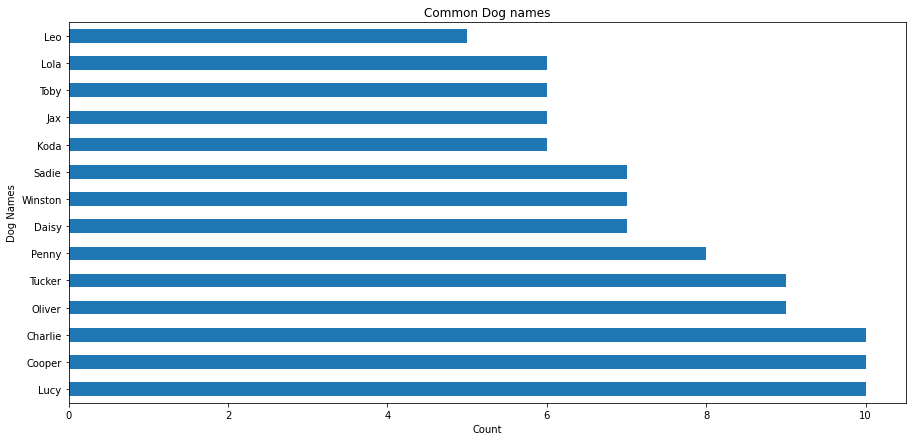

In [742]:
#Plotting of bar graph that shows common dog names
Twitter_df.name.value_counts()[1:15].plot(kind='barh',figsize=(15,7))
plt.xlabel('Count')
plt.ylabel('Dog Names')
plt.title('Common Dog names');


According to the bargraph, the most commonly used dog names are Lucy, Cooper and Charlie.

#### 2. What is the most common dog species?

In [730]:
#Displaying of the number dog species in the Twitter Dataframe
Twitter_df['dog_species'].value_counts()

golden_retriever      158
Labrador_retriever    108
Pembroke               95
Chihuahua              91
pug                    62
                     ... 
Scotch_terrier          1
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
Irish_wolfhound         1
Name: dog_species, Length: 113, dtype: int64

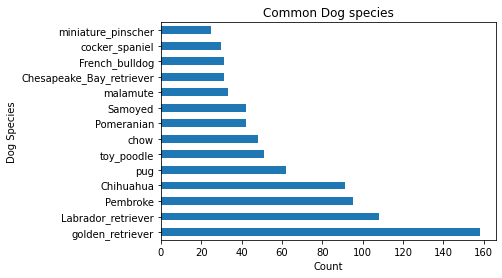

In [741]:
#Plotting of bargraph that shows common dog species
dog_species_df = Twitter_df.groupby('dog_species').filter(lambda x: len(x) >= 25)

dog_species_df['dog_species'].value_counts().plot(kind = 'barh')
plt.title('Common Dog species')
plt.xlabel('Count')
plt.ylabel('Dog Species')
fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

The golden retriever is the most common dog species.

##### 3. What is the most common dog type?

In [732]:
#Display the total number under each variable
Twitter_df['dog_type'].value_counts()

pupper     183
doggo       61
puppo       27
floofer      3
Name: dog_type, dtype: int64

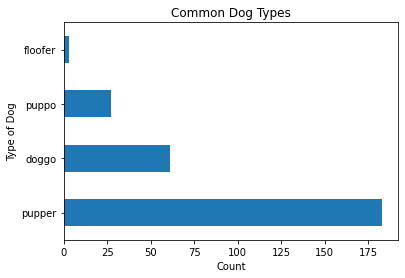

In [739]:
#Plot a bar graph the shows the The common dog types
Twitter_df['dog_type'].value_counts().plot(kind='barh')
plt.xlabel("Count")
plt.ylabel("Type of Dog")
plt.title("Common Dog Types");

The most common dog type is the pupper

##### 4.Which Dog Species has the most favorite counts?

In [763]:
#Group the favorite dog counts for the dog types
fave_dog_type =  Twitter_df.groupby(['dog_type']).mean().favorite_count.sort_values(ascending=False)

Text(0.5, 0, 'Count')

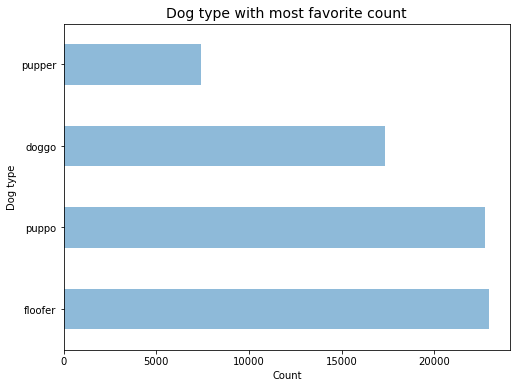

In [765]:
#Plot a bar graph to show the Dog type with the Most favorite Counts
fave_dog_type.plot(kind='barh', title='count',figsize=(8, 6),alpha = 0.5)
plt.title('Dog type with most favorite count', size =14)
plt.ylabel('Dog type')
plt.xlabel('Count')

The dog type with the highest favorite count is a floofer

In [759]:
#Store the Twitter Dataframe to the Master Twitter Archive Dataframe Archive
Twitter_df.to_csv('twitter_archive_master.csv')

### Download the twitter_archive_master.csv

In [760]:
#Import necessary packages
from IPython.display import HTML

In [761]:
#Create a download link
def create_download_link(title = "Download CSV file", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

In [762]:
#Create a link to download the dataframe which was saved with .to_csv method
create_download_link(filename='twitter_archive_master.csv')